In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## objective: improve customer experience by analyzing sales data, increase revenue

In [122]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
df.shape # rows, columns

(11251, 15)

In [123]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


# data cleaning

In [124]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [125]:
# drop unrelated/blank column

df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [126]:
df.isnull().sum()  # we are having 12 null values in the amount column.

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [127]:
df.shape

(11251, 13)

In [128]:
df.dropna(inplace=True) # removing rows that contain NaN values

In [12]:
df.shape # no. of rows decreased

(11239, 13)

In [129]:
df.isnull().sum() # no NaN values in df

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [130]:
df[['Age','Orders','Amount']].describe() # to get an overview of the data.

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

In [131]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [28]:
# print(plt.style.available)
# plt.style.use('dark_background') 

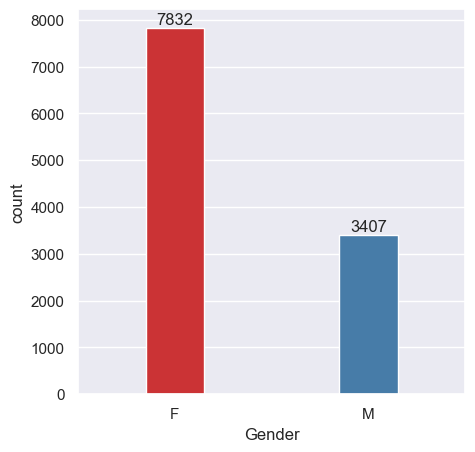

In [138]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Gender', data=df, hue='Gender',palette='Set1',width=0.3)
for bar in ax.containers:
    ax.bar_label(bar)


In [33]:
# df

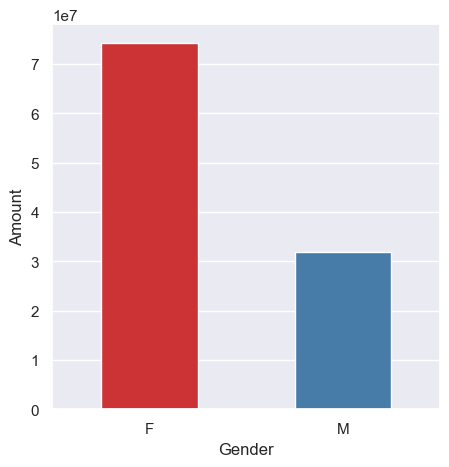

In [140]:
plt.figure(figsize=(5,5))
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
# sales_gen
ax = sns.barplot(x='Gender',y='Amount',data=sales_gen, hue='Gender',palette='Set1', width=0.5) # plotting a bar chart for gender vs total amount


From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

# Age

In [96]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

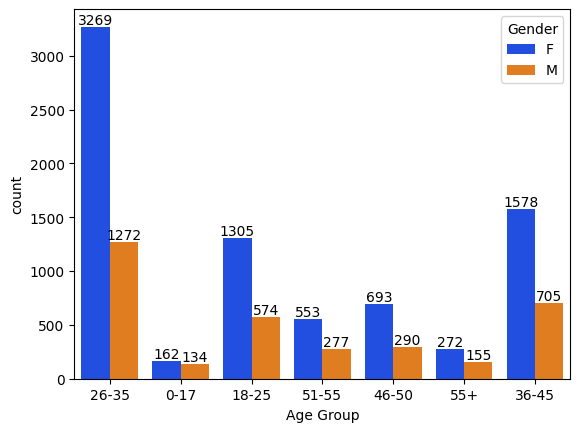

In [48]:
ax = sns.countplot(data=df, x='Age Group',hue='Gender',palette='bright')
for bar in ax.containers:
    ax.bar_label(bar)

In [39]:
sales_age = df.groupby(['Age Group','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_age


,Age Group,Gender,Amount
4,26-35,F,30963954.94
6,36-45,F,15509957.49
2,18-25,F,11887003.00
5,26-35,M,11649489.00
8,46-50,F,6743393.00
7,36-45,M,6635038.00
10,51-55,F,5385208.00
3,18-25,M,5353729.00
11,51-55,M,2876269.00
9,46-50,M,2464451.00


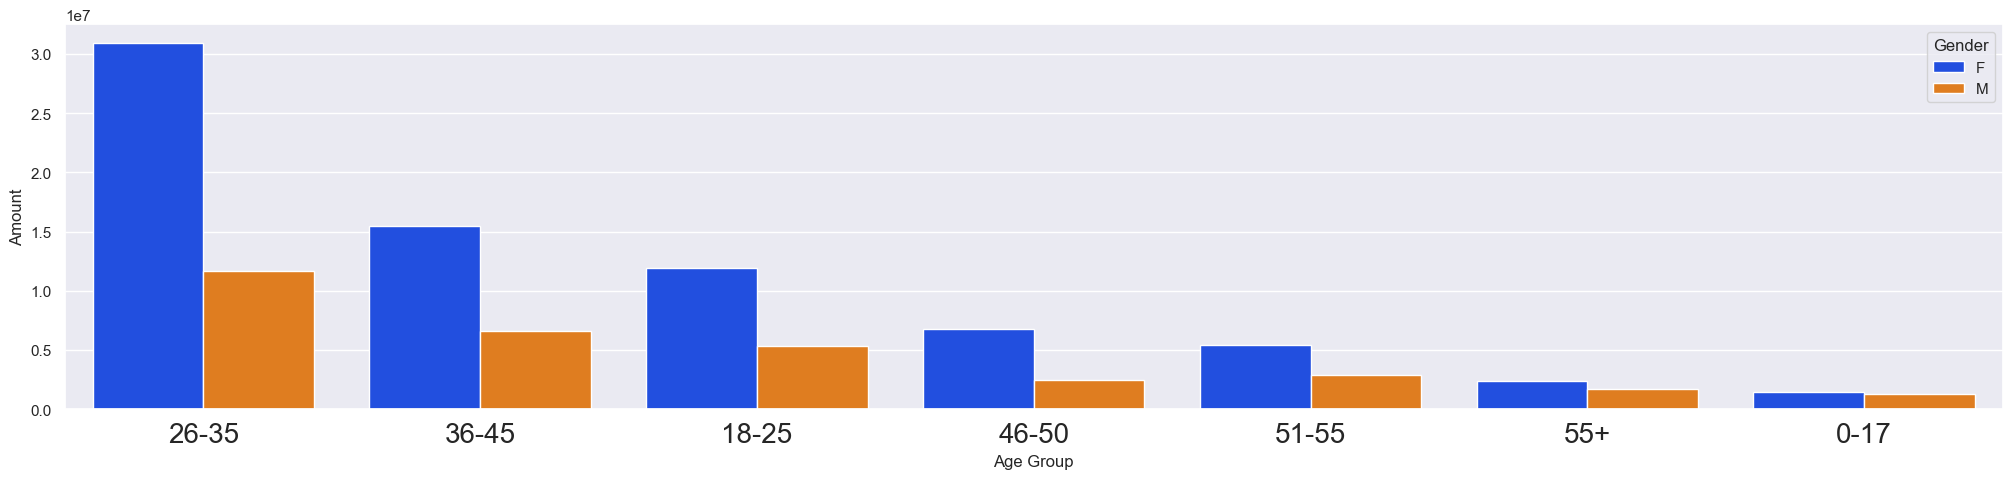

In [145]:
ax = sns.barplot(x='Age Group' ,y='Amount', data=sales_age, hue='Gender',palette='bright')
plt.xticks(fontsize=20)
plt.show()

from above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# State

In [147]:
# df.columns

In [146]:
# sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
# sales_state

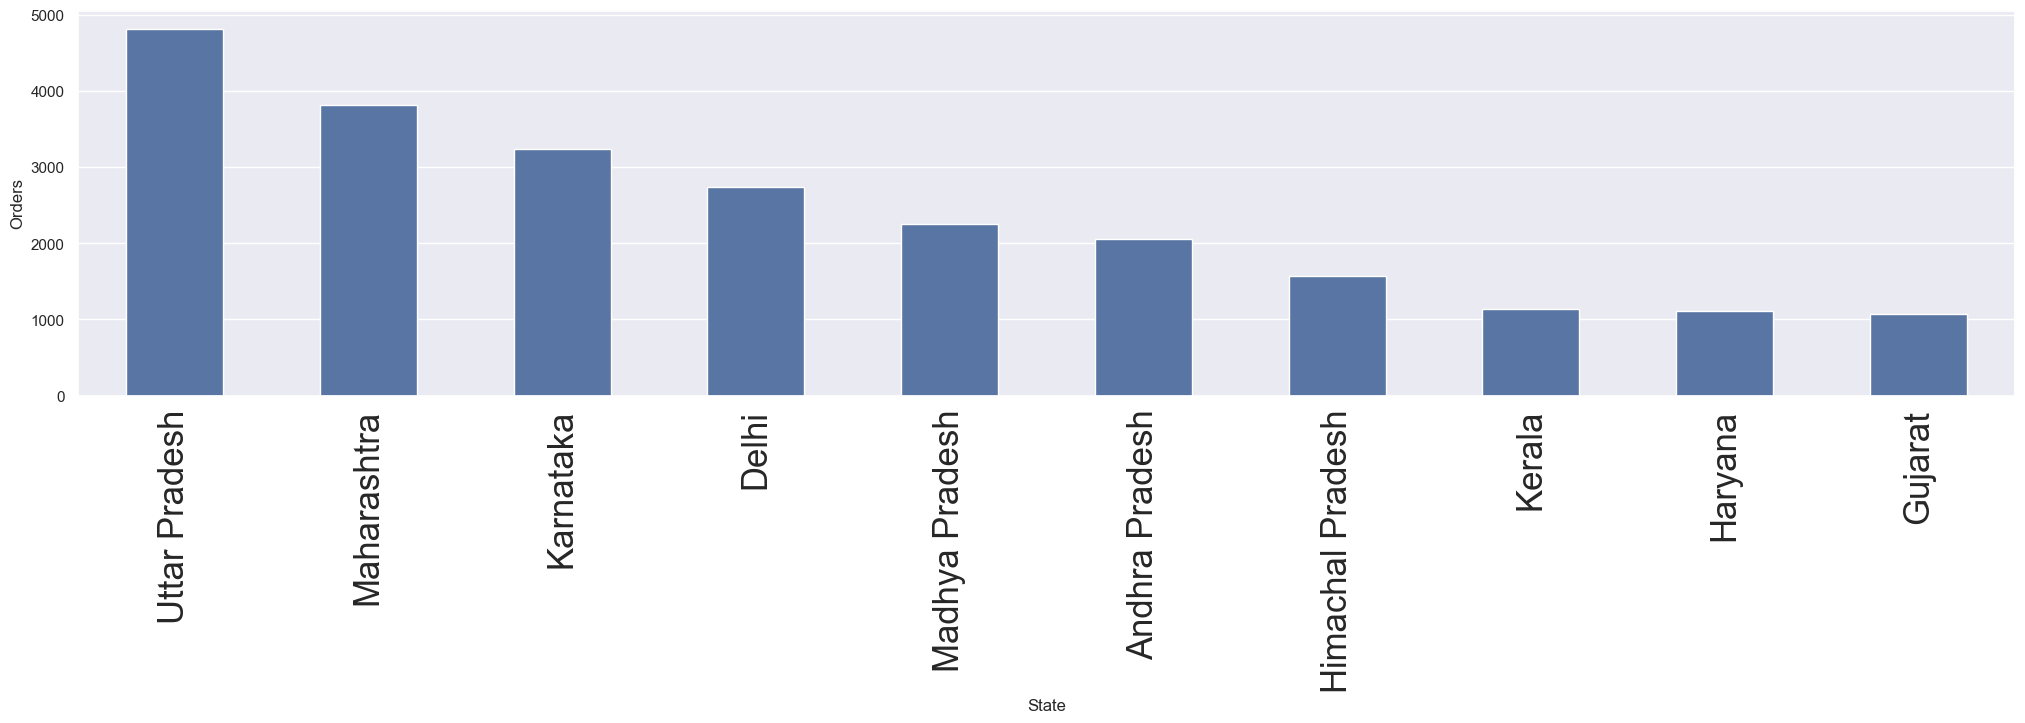

In [65]:
sns.barplot(data=sales_state, x='State', y='Orders',width=0.5)
plt.xticks(rotation=90, fontsize=25) 
plt.show()

In [103]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


In [62]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


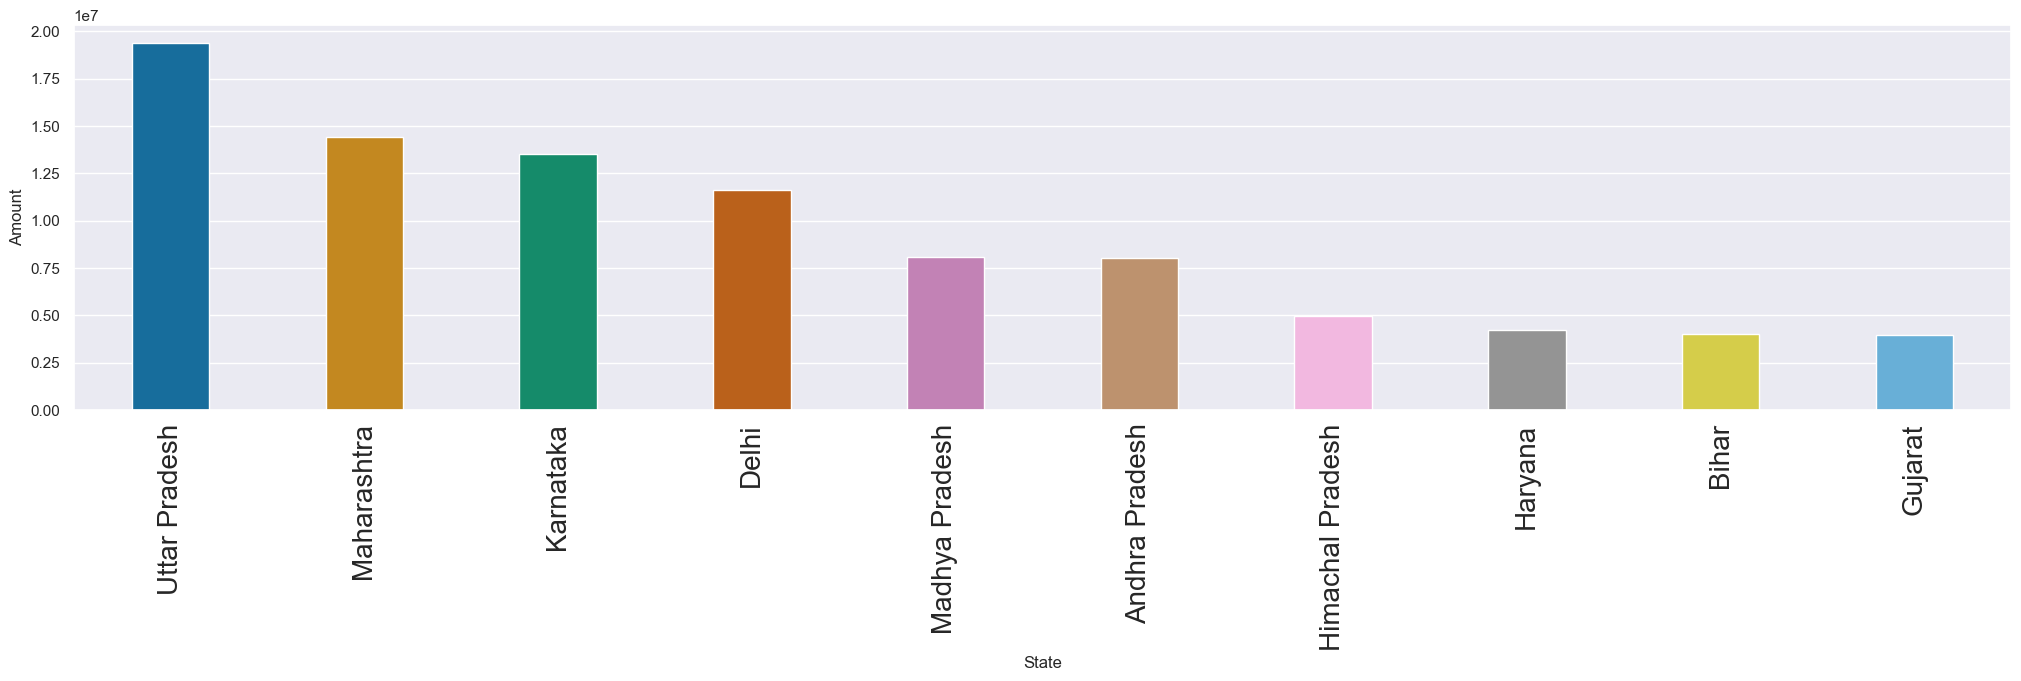

In [105]:
# plt.figure(figsize=(25,5))
sns.barplot(x='State', y='Amount', data=sales_state, width=0.4, palette='colorblind', hue='State')
plt.xticks(rotation=90, fontsize=20) 
plt.show()

From the above graphs we can see that most of the orders are from Uttar Pradesh, maharastra and Karnataka respectively.

# Marital Status

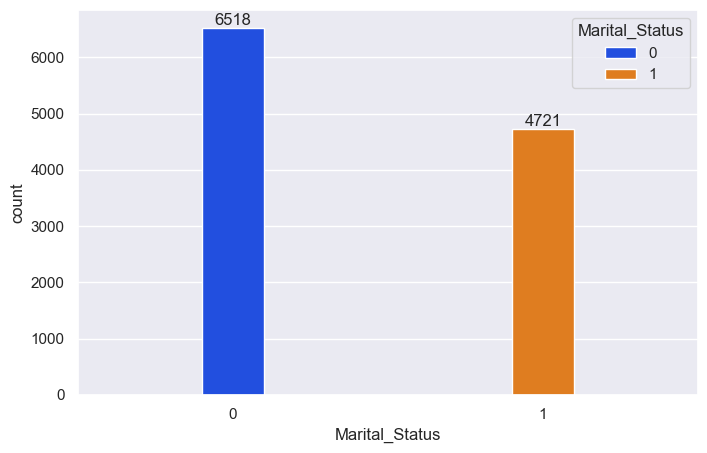

In [94]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Marital_Status',palette='bright',hue='Marital_Status',width=0.2)

for bar in ax.containers:
    ax.bar_label(bar)

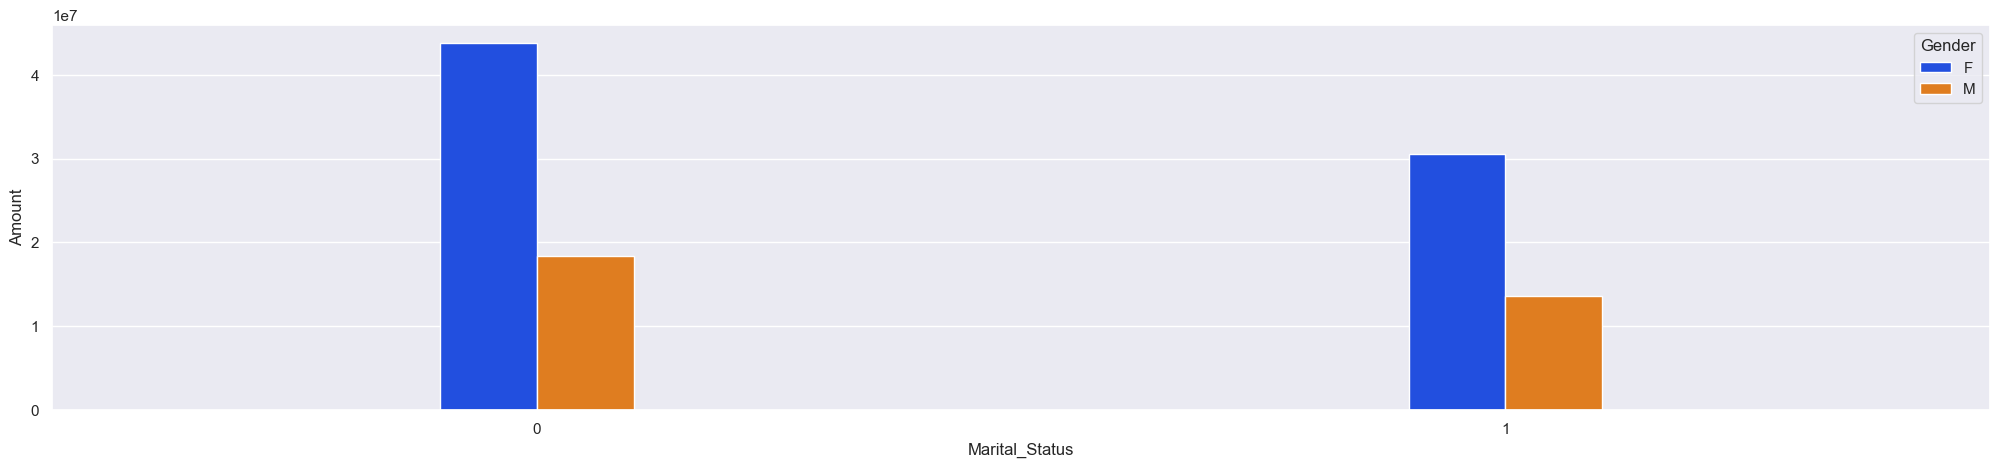

In [101]:
sales_marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_marital_status
ax = sns.barplot(data=sales_marital_status, x='Marital_Status', y='Amount', hue='Gender',palette='bright',width=0.2)


From the above graph we can see that most of the buyers are married (women) and they have high purchasing power


# Occupation

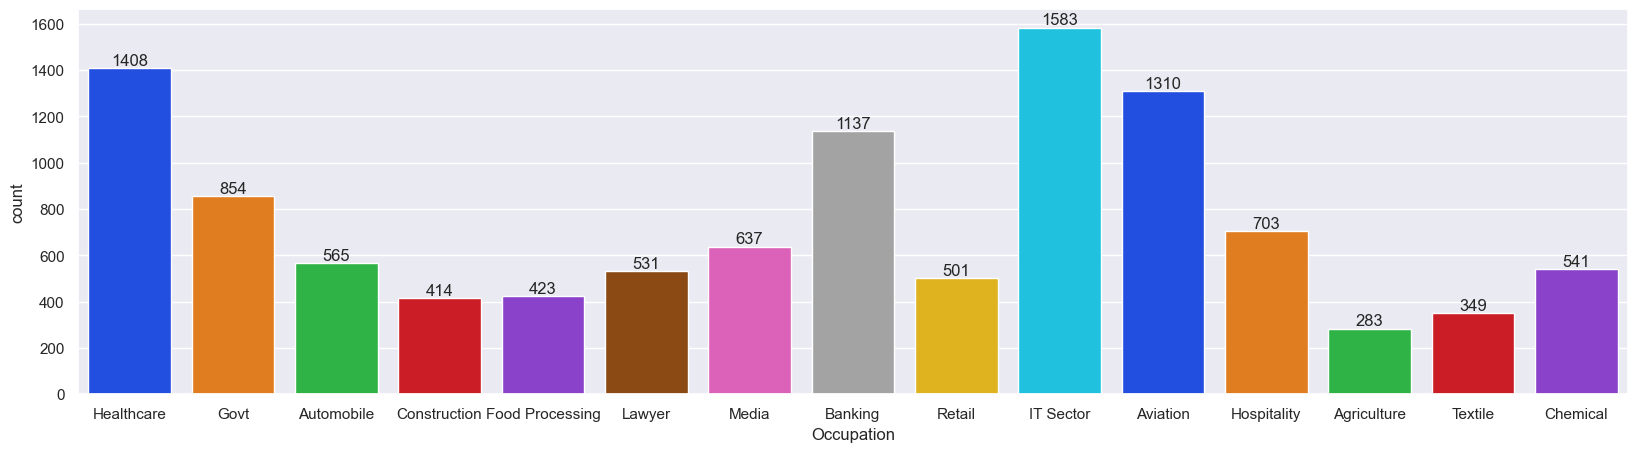

In [88]:
plt.figure(figsize = (20,5))
ax = sns.countplot(data=df, x='Occupation',palette='bright',hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [79]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_occupation

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6376405.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


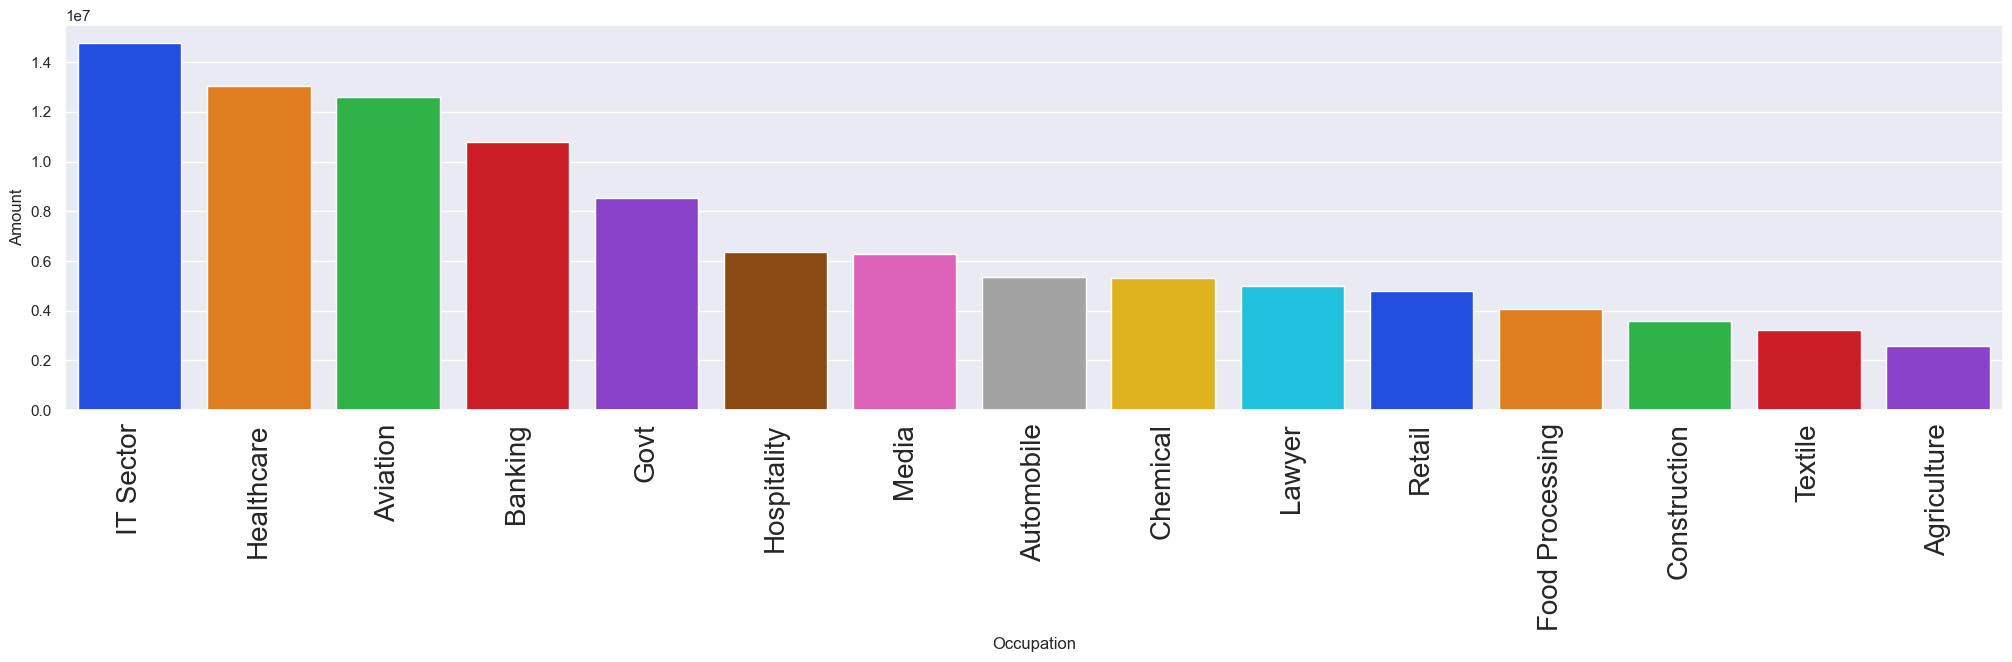

In [90]:
ax = sns.barplot(data=sales_occupation, x='Occupation', y='Amount',palette='bright',hue='Occupation')
plt.xticks(rotation=90, fontsize=20)
plt.show()

From the above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation.

# product category

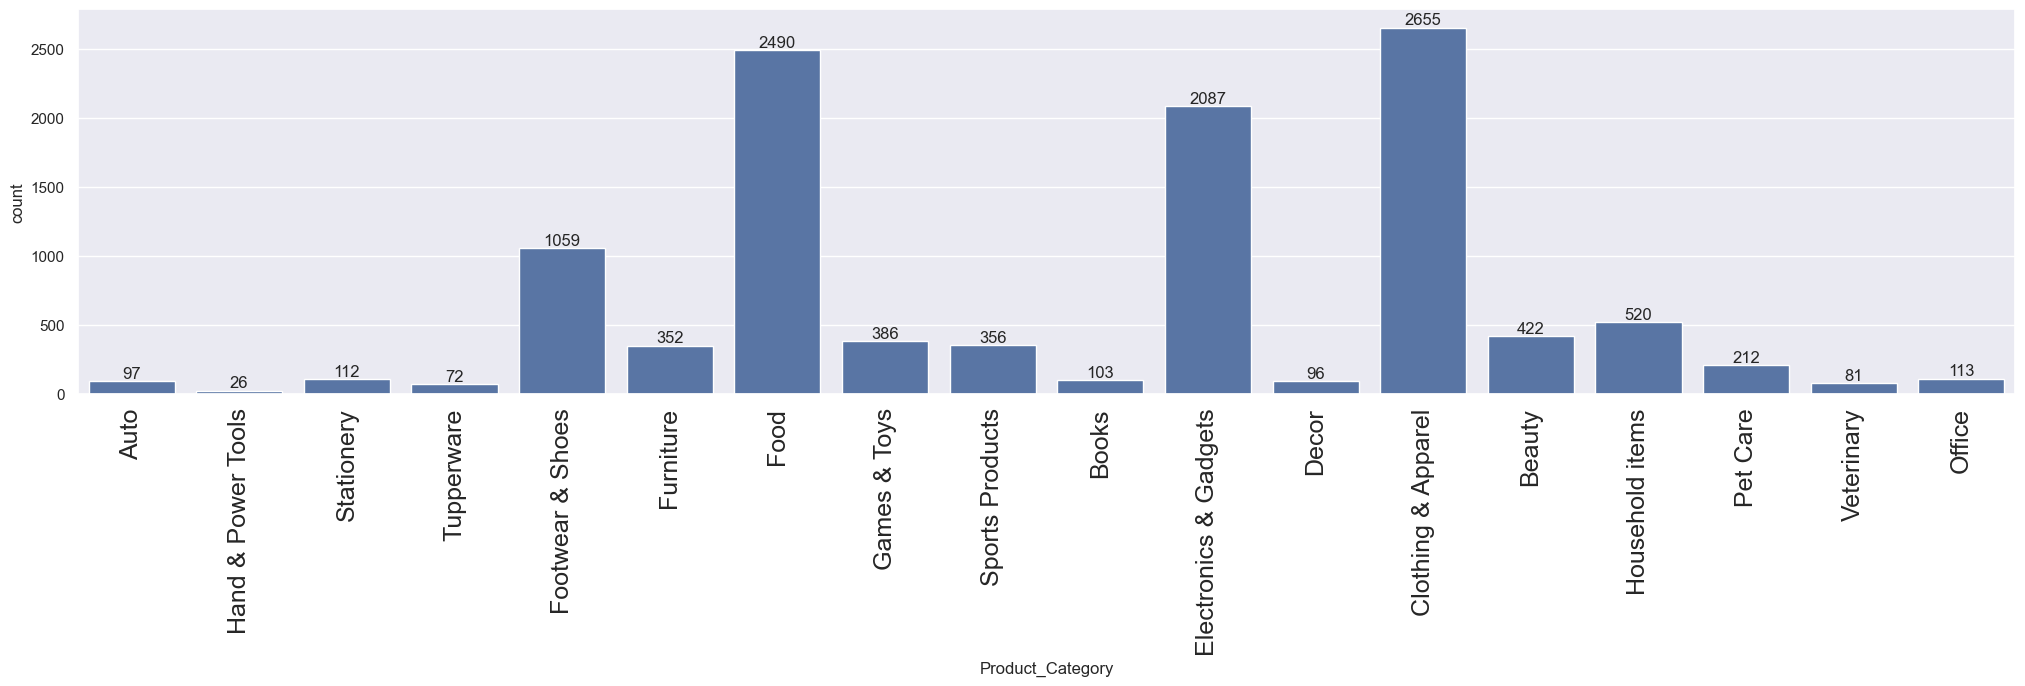

In [151]:
ax = sns.countplot(data=df, x='Product_Category')
plt.xticks(rotation=90,fontsize=18)
for bars in ax.containers:
    ax.bar_label(bars)

In [153]:
sales_pro_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_pro_category

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


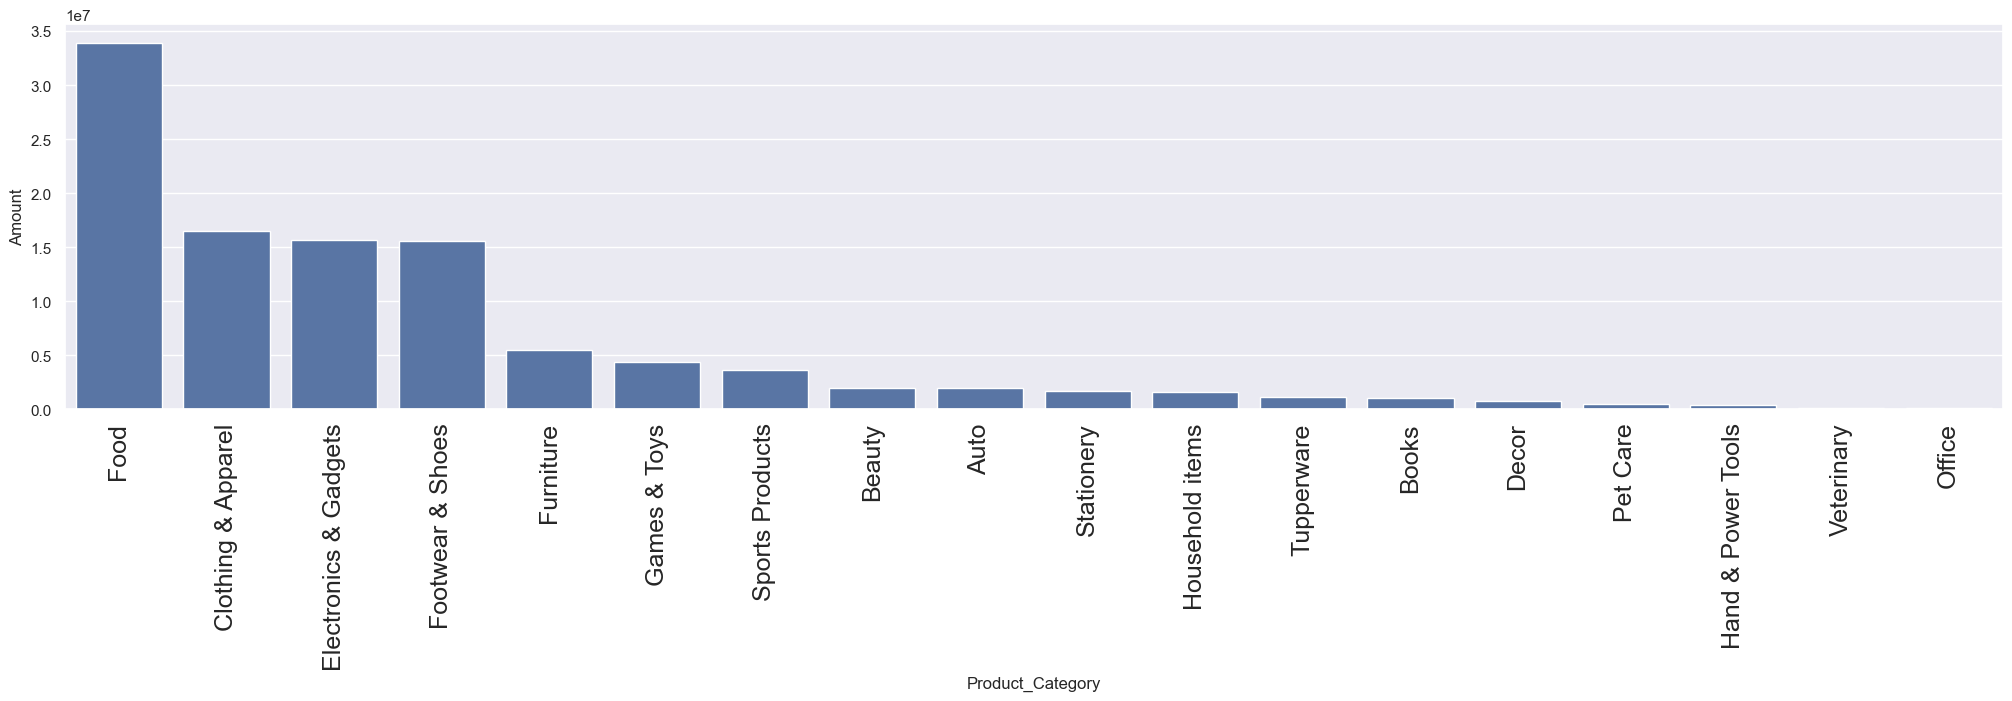

In [155]:
sns.barplot(data=sales_pro_category, x='Product_Category', y='Amount')
plt.xticks(rotation=90,fontsize=18)
plt.show()

From the above graphs we can see that the most of the sold products are from Food, Clothing and Electronics category.

In [108]:
sales_proId = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by="Orders", ascending=False).head(10)
sales_proId

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


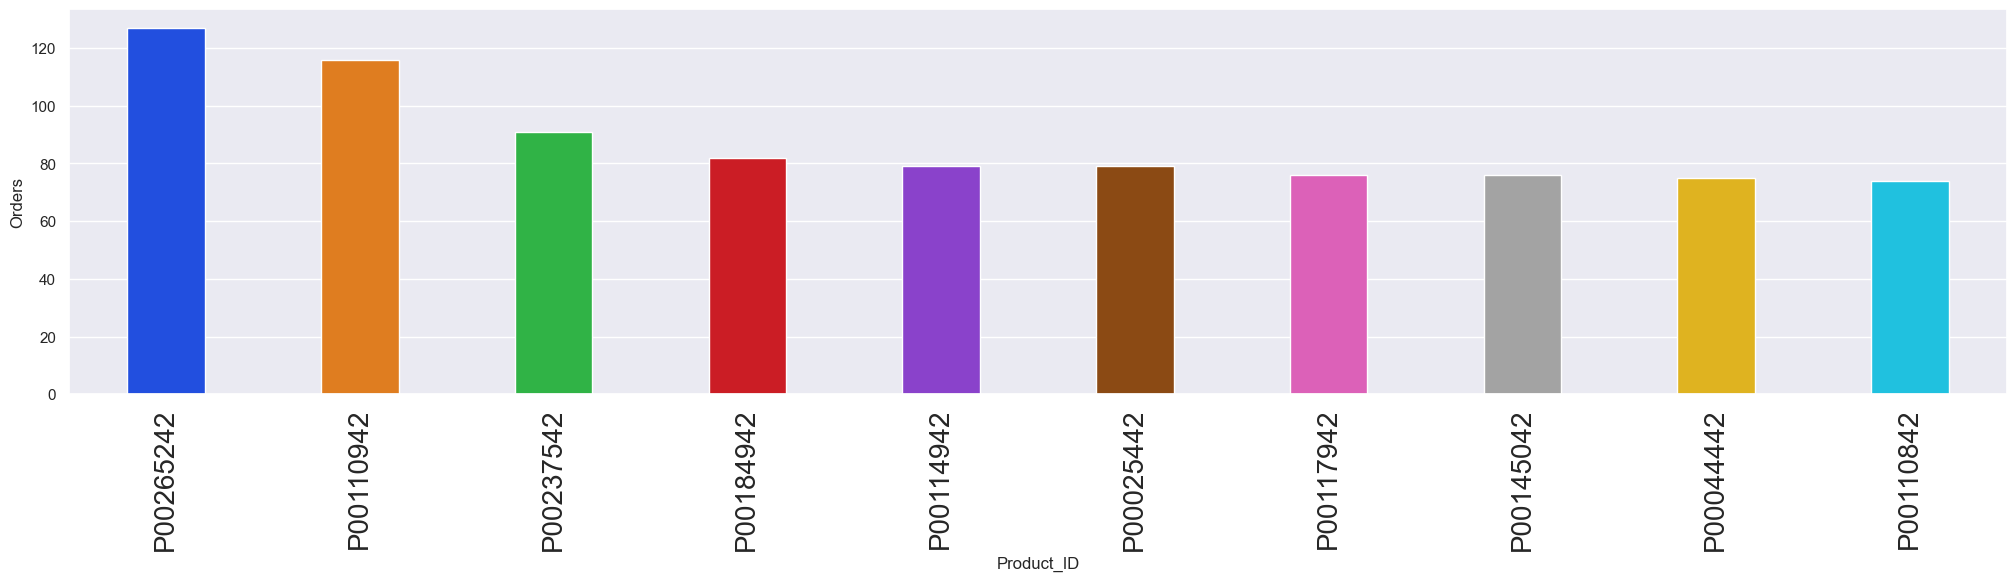

In [149]:
# df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
ax = sns.barplot(data=sales_proId, x='Product_ID', y='Orders',hue='Product_ID', palette='bright',width=0.4)
plt.xticks(rotation=90, fontsize=20)
plt.show()

Married women age group 26-35 years from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, CLothing and Electronics category. 

# Project Learnings:

* Performed data cleaning and manipulation. [drop(), dropna(), drop_duplicates(), unique()]
* Performed EDA using pandas, matplotlib and seaborn libraries.
* Improved custome experience by identifying potential customers across different states, occupation, gender and age groups.
* Improved sales by identifying most selling product categories and products, which help to plan inventory and hence meet the demands.